# Problem
It is late at night and a drunkard is walking along a very long street. The drunkard is not sure which is the way home, so he randomly takes steps of length 1 m forward or backward. He takes one step every second continuously for 1 hour.

1.  Simulate  the  drunkard’s  walk  by  using  a  random  number  generator.
2.   Generate   100   diﬀerent   realizations   of   the   random   sequence   of   steps   by using  a  diﬀerent  seed  each  time.
3.  Graphically  show  the  random  walks.
4.  Calculate  the  displacement  of  the  drunkard  for  each  realization,  and  show graphically  how  these  are  distributed  using  a  histogram.
5.  Calculate  the  mean  and  the  root  mean  square  (RMS)  displacement  of  the drunkard  after  1  hour.
6. Increase the time (number of steps) and show that the mean displacement tends to 0 and the RMS displacement scales as the square-root of the time.

# Method

We can simulate random walks using the `random.choice()` function of the random module. Here, since we are dealing with a 1-D walk, we can keep our choices as +1 and -1.
We maniuplate the seed in each case using the `random.seed()` method.


# Program

1. Simulating a random walk

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

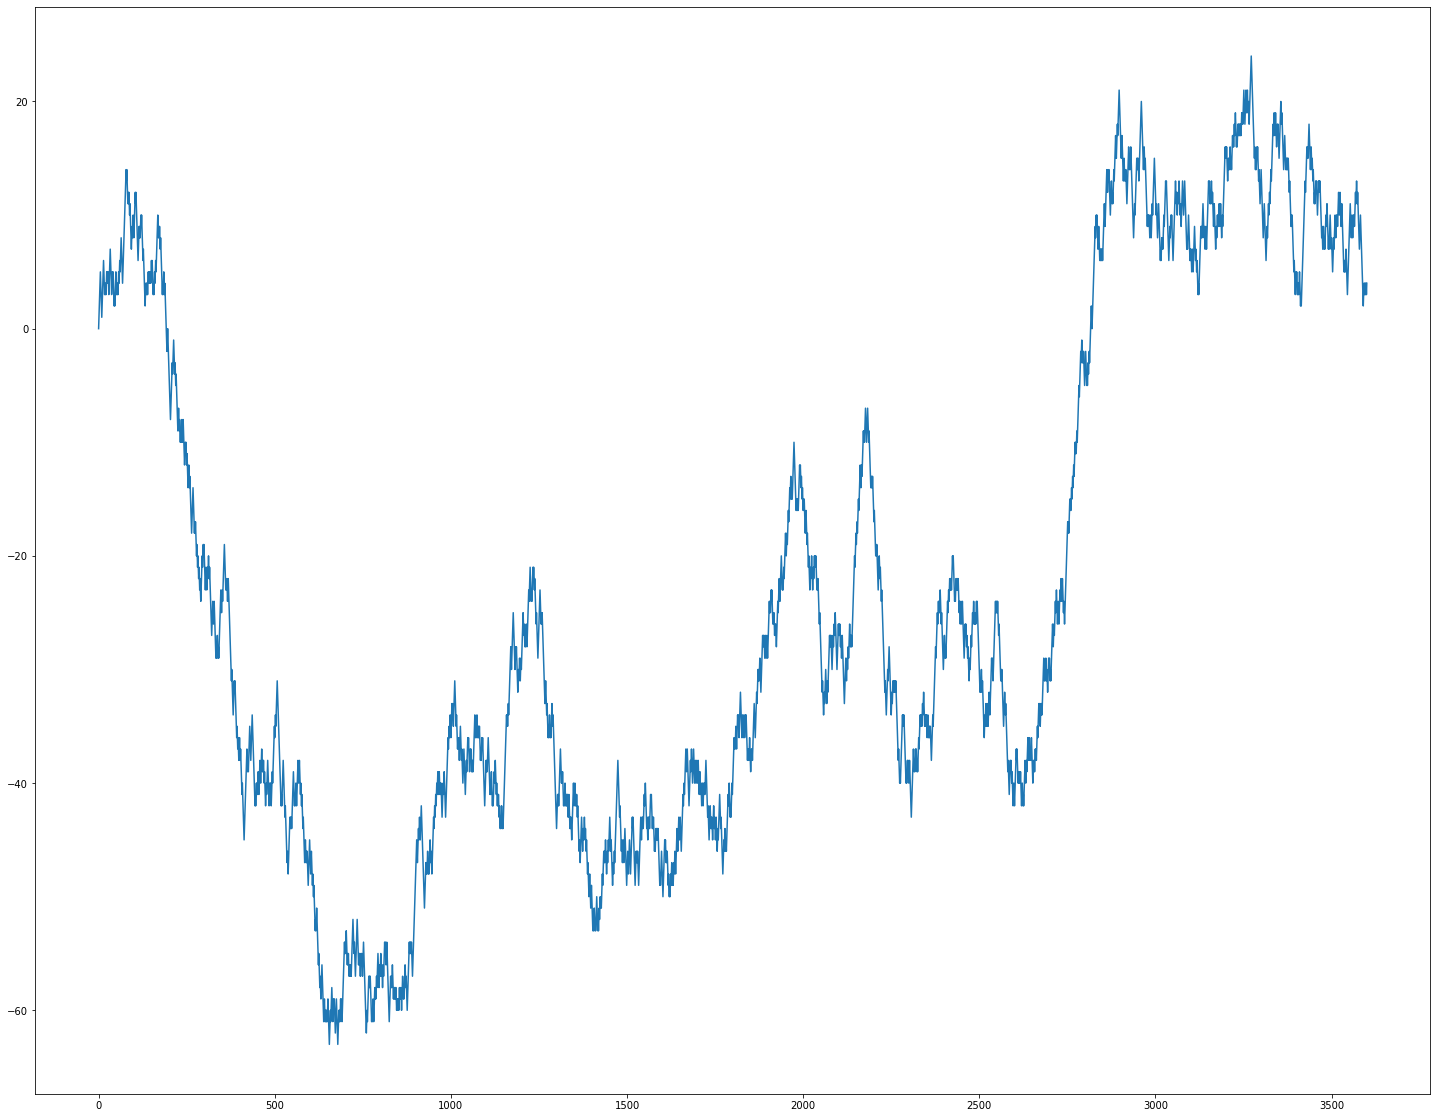

In [2]:
fig = plt.figure(figsize=(25,20))

random.seed()

def randomwalk(steps):
    
    start = 0
    pos = [start]


    for i in range(steps):
        cur = pos[-1]
        b = random.choice([-1, 1])
        cur = cur + b
        pos.append(cur)

    plt.plot(range(steps+1),pos)
    return(pos)

a = randomwalk(3600)

In [3]:
a[-1]

4

## Different realisations using different seeds

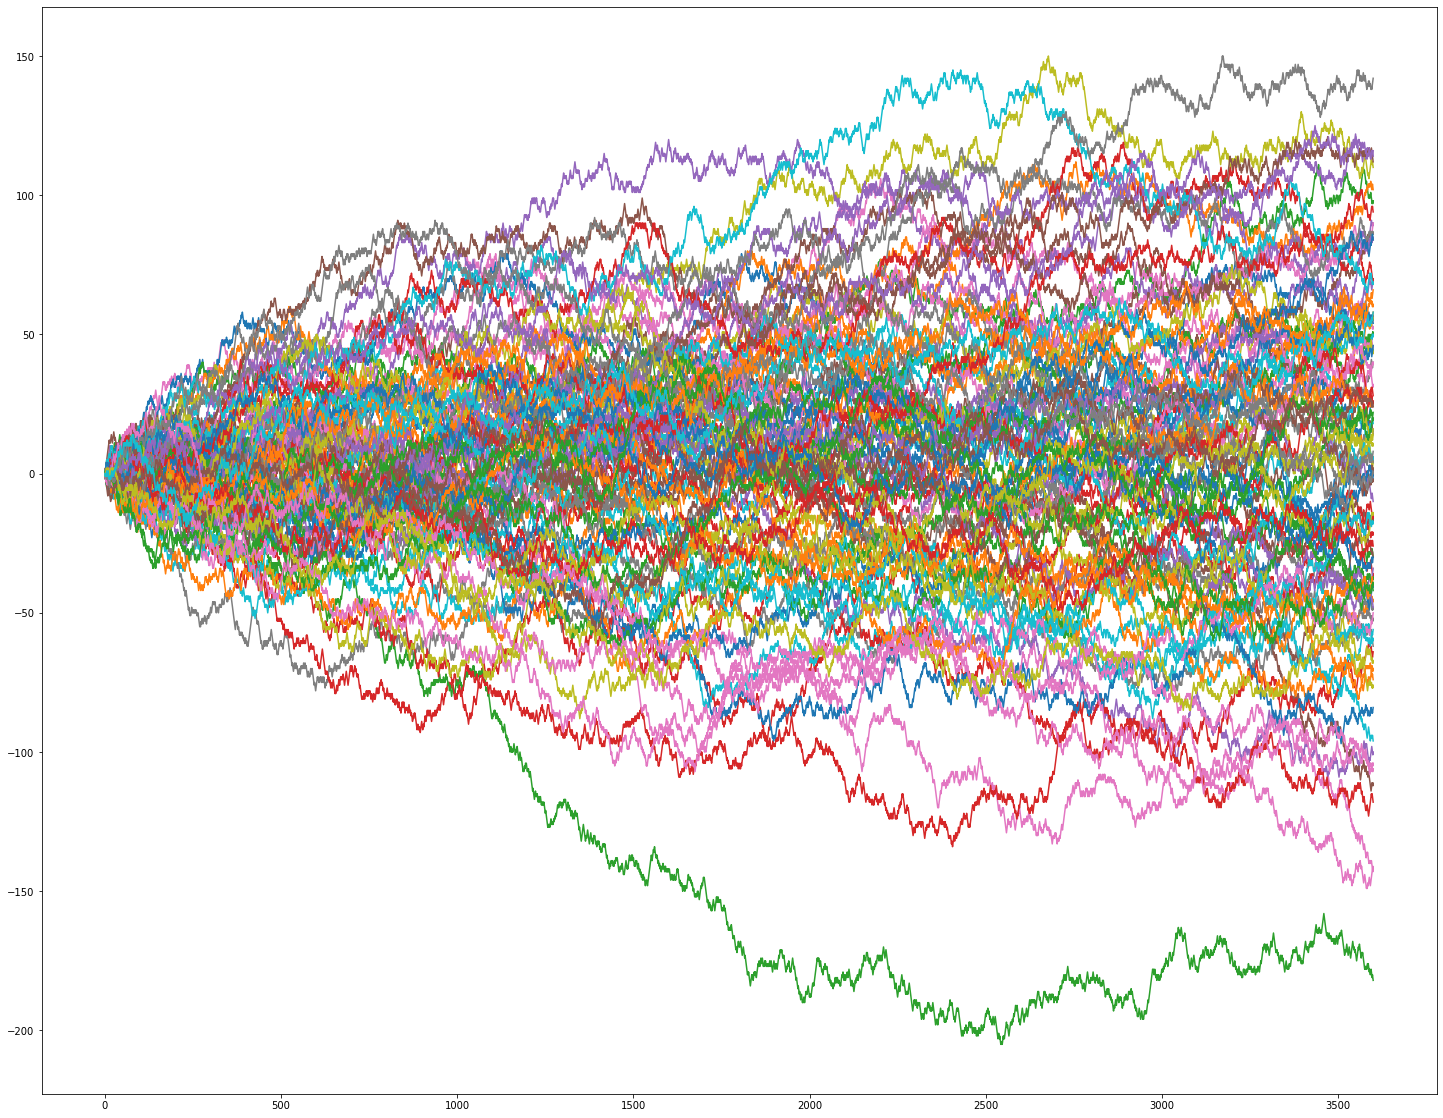

In [42]:
#For this example, we shall be re-initialising the seed each iteration.
fig = plt.figure(figsize=(25,20))

disp_list = []

for j in range(100):
    random.seed()
    c = randomwalk(3600)
    disp  = c[-1]
    disp_list.append(disp)

plt.show()

## Histogram for displacement distribution

(array([ 1.,  3.,  5.,  9., 17., 18., 17., 16.,  9.,  5.]),
 array([-182. , -149.6, -117.2,  -84.8,  -52.4,  -20. ,   12.4,   44.8,
          77.2,  109.6,  142. ]),
 <BarContainer object of 10 artists>)

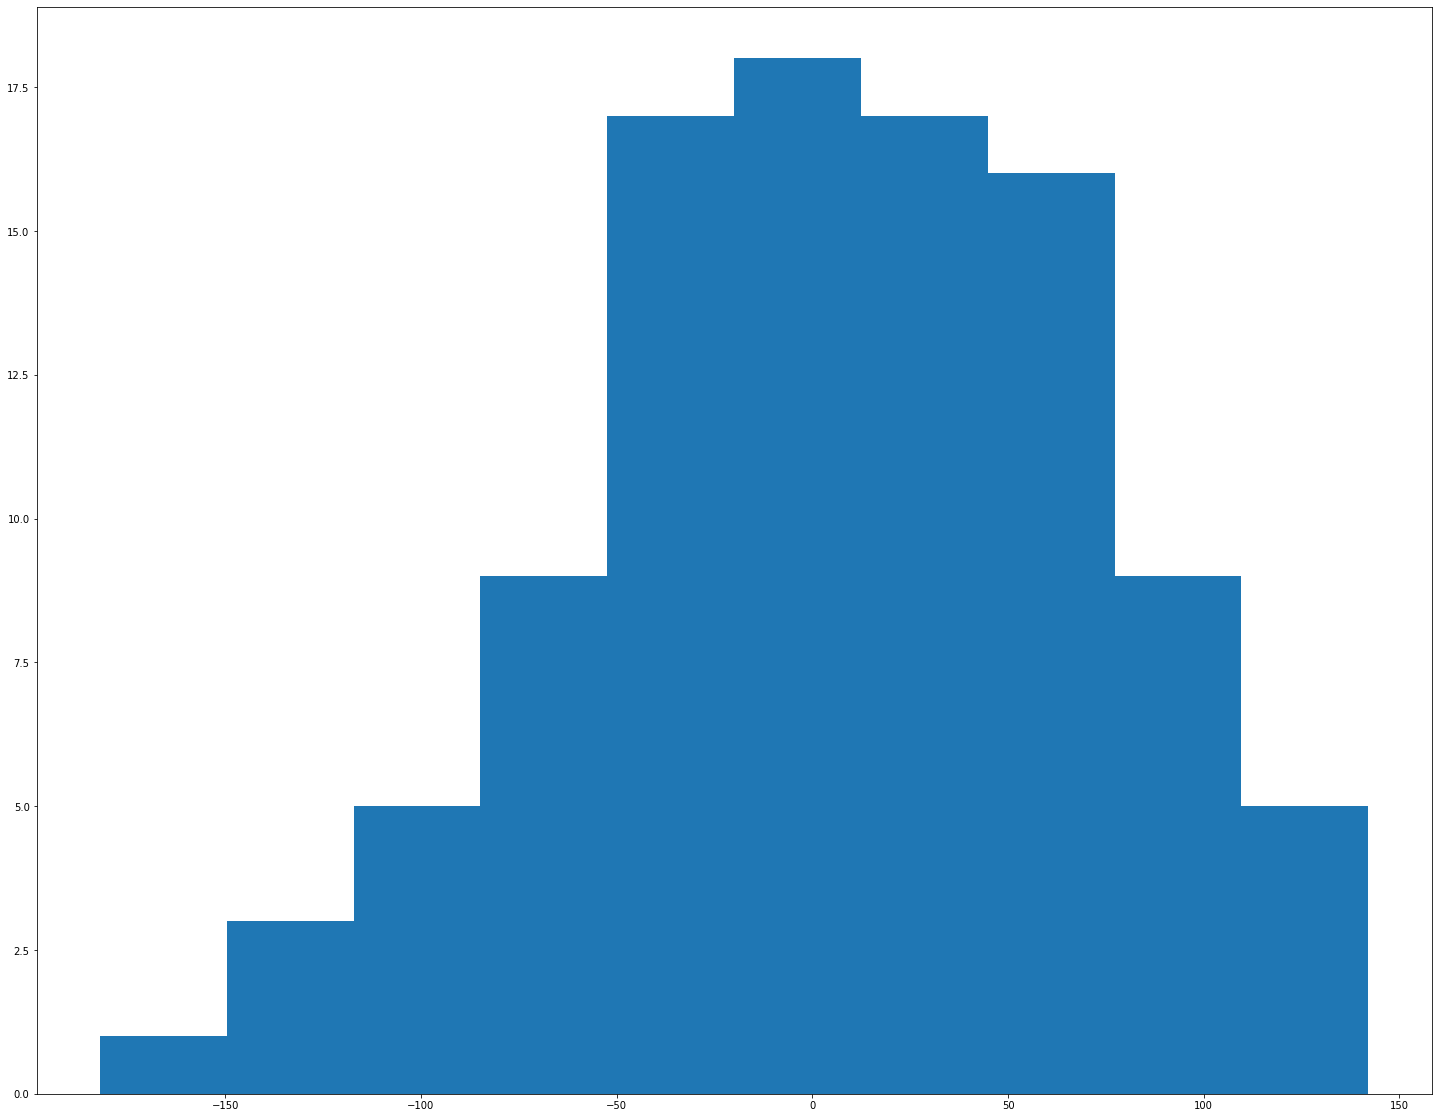

In [43]:
fig = plt.figure(figsize=(25,20))

plt.hist(disp_list)

## Calculation of Mean and Standard Deviation

In [44]:
from statistics import mean,stdev

print('Mean =',mean(disp_list))
print('ST.Dev =',stdev(disp_list))

Mean = 3.52
ST.Dev = 65.28453341359118


## Verification for different step sizes

It is important to note that this problem is not very computationally efficient. Hence, when comparing with number of stemps we start off with a lower number of steps and do our study for only some values.

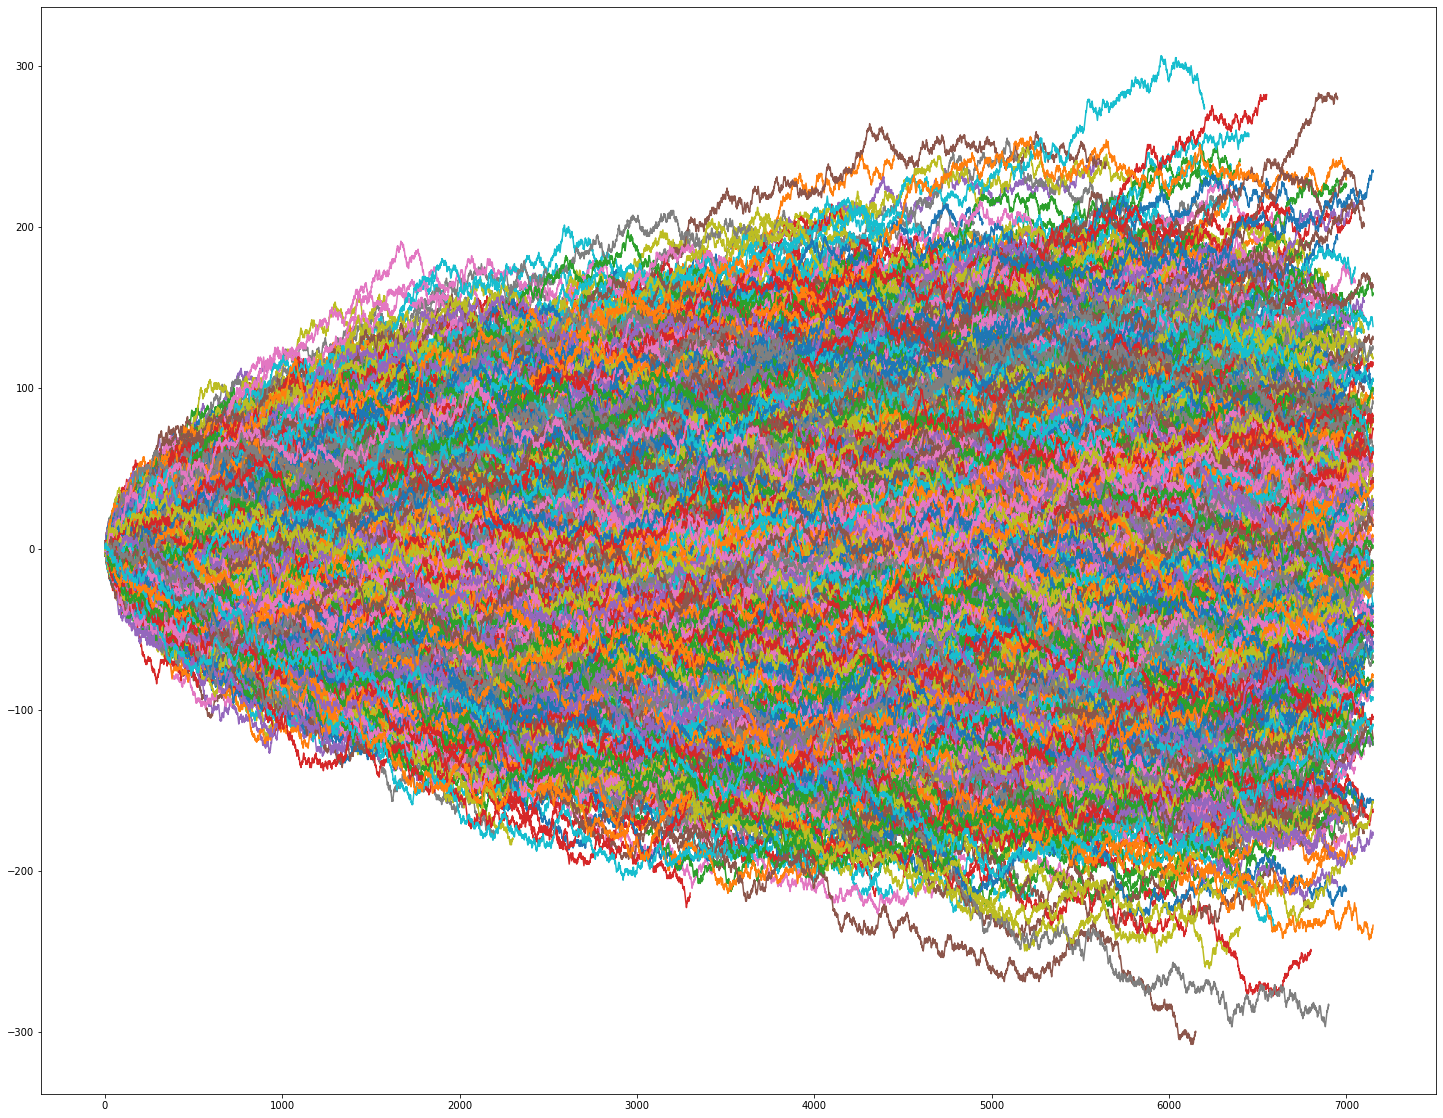

In [7]:

fig1 = plt.figure(figsize=(25,20))



mean_disp = []
stdev_disp = []

for steps in range(1800,7200,50):
    disp_list=[]
    for j in range(100):
        random.seed()
        c = randomwalk(steps)
        disp  = c[-1]
        
        
        disp_list.append(disp)


    mean_disp.append(mean(disp_list))
    stdev_disp.append(stdev(disp_list))
        

plt.show()
    



-0.7038888888888889


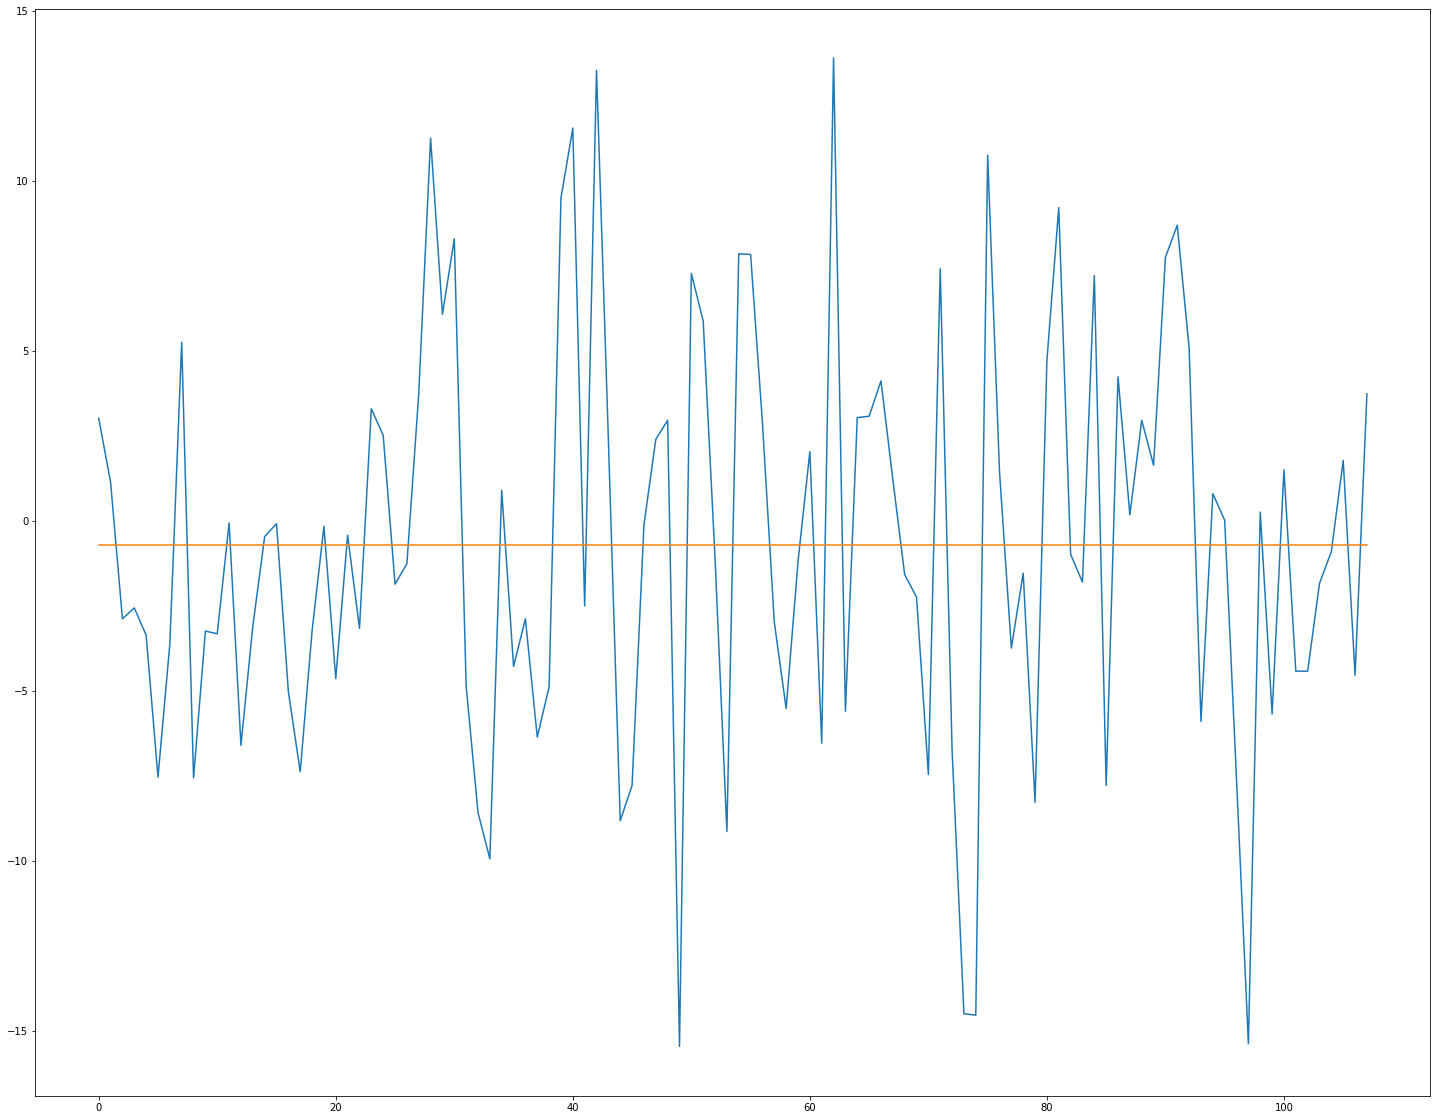

In [14]:
fig1 = plt.figure(figsize=(25,20))

plt.plot(range(len(mean_disp)),mean_disp)
plt.plot(range(len(stdev_disp)),(np.array([mean(mean_disp) for i in range(1800,7200,50)])))

print(mean(mean_disp))

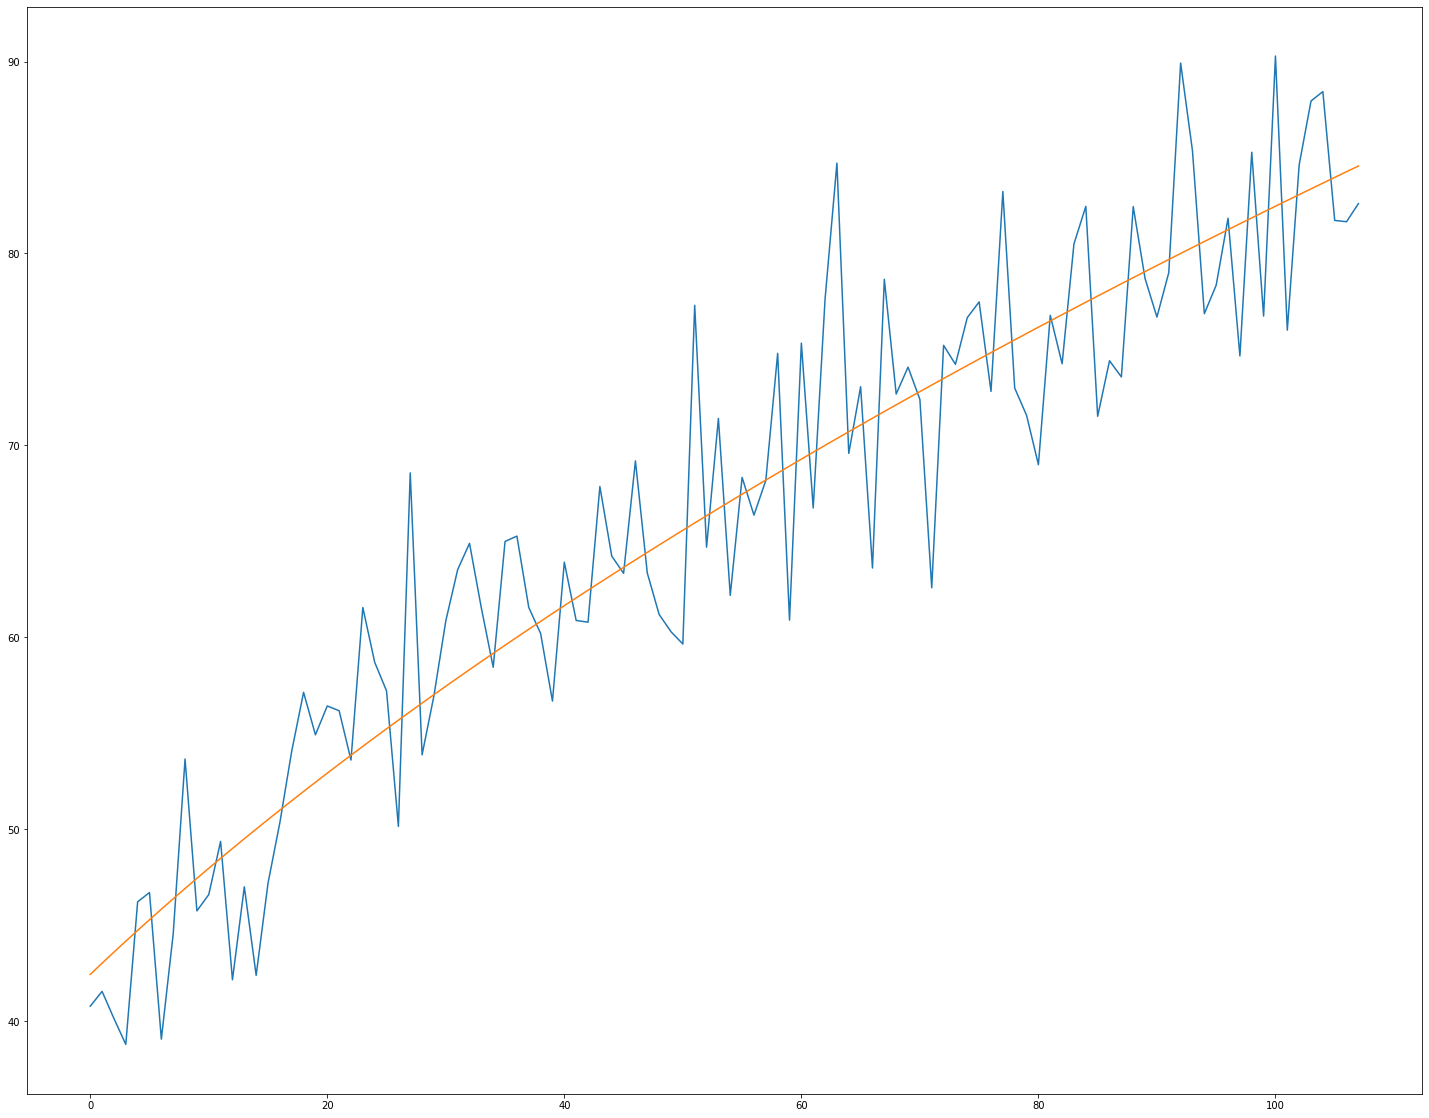

In [12]:
fig1 = plt.figure(figsize=(25,20))

plt.plot(range(len(stdev_disp)),stdev_disp)

plt.plot(range(len(stdev_disp)),np.sqrt(np.array([i for i in range(1800,7200,50)])))

# Conclusion

We can ultimately verify that the mean value tends to 0, and the standard deviation obtained is close to $\sqrt{N}$. There is definitely some fluctuation but that is due to lack of computational resources. 

## Further Discussion

The results verify a theorem in statistics known as the central-limit theorem. The central-limit theorem states that the endpoints of an ensemble of $N$ step one-dimensional random walks with root-mean-square (RMS) step-size $a$ has a Gaussian or normal probability distribution as $N \rightarrow \infty$.

$\rho(x)=\frac{1}{\sigma\sqrt{2 \pi}} \exp{(-x^2/2\sigma^2)} \text{ where } \sigma = a\sqrt{N}$



